# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

import warnings
warnings.filterwarnings('ignore')

# Dataset

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data Preprocessing

In [3]:
X = train.drop(['label'], axis = 1).values
y = train['label'].values
X = X / 255.0
X = X.reshape(-1, 28, 28, 1)

## Label Conversion

In [4]:
y = to_categorical(y)
print(f"Label size {y.shape}")

Label size (42000, 10)


## Data Splitting

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

## Data Reshape

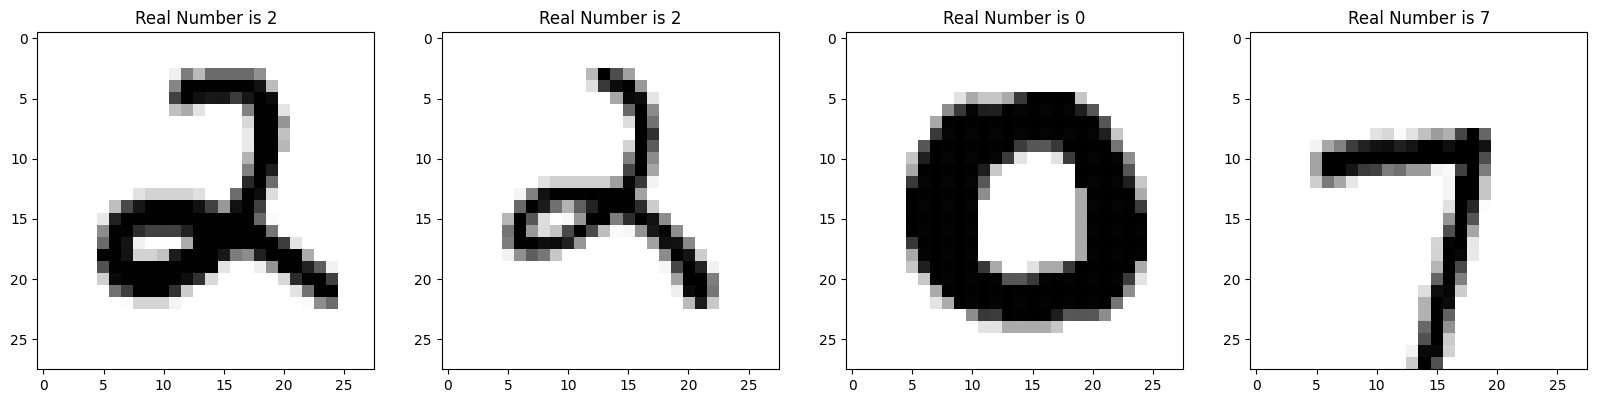

In [6]:
X_train__ = X_train.reshape(X_train.shape[0], 28, 28)

fig, axis = plt.subplots(1, 4, figsize = (20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train__[i], cmap = 'binary')
    digit = y_train[i].argmax()
    ax.set(title = f"Real Number is {digit}");

## Mean & Standard Deviation

In [7]:
mean = np.mean(X_train)
std = np.std(X_train)
def standardize(x):
    return (x-mean) / std

# CNN Model

## Define Model

In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

## Model Summary

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 232,650 (908.79 KB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)

## Compile Model

In [10]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

## Model Fit

In [11]:
history = model.fit(X_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    verbose = 2,
                    validation_split = 0.3)

Epoch 1/10
207/207 - 27s - 129ms/step - accuracy: 0.8372 - loss: 0.5086 - val_accuracy: 0.9660 - val_loss: 0.1186
Epoch 2/10
207/207 - 48s - 232ms/step - accuracy: 0.9642 - loss: 0.1184 - val_accuracy: 0.9763 - val_loss: 0.0763
Epoch 3/10
207/207 - 33s - 160ms/step - accuracy: 0.9769 - loss: 0.0795 - val_accuracy: 0.9807 - val_loss: 0.0654
Epoch 4/10
207/207 - 44s - 213ms/step - accuracy: 0.9820 - loss: 0.0609 - val_accuracy: 0.9832 - val_loss: 0.0607
Epoch 5/10
207/207 - 39s - 189ms/step - accuracy: 0.9851 - loss: 0.0507 - val_accuracy: 0.9845 - val_loss: 0.0527
Epoch 6/10
207/207 - 40s - 193ms/step - accuracy: 0.9867 - loss: 0.0420 - val_accuracy: 0.9865 - val_loss: 0.0498
Epoch 7/10
207/207 - 43s - 210ms/step - accuracy: 0.9900 - loss: 0.0322 - val_accuracy: 0.9853 - val_loss: 0.0552
Epoch 8/10
207/207 - 41s - 200ms/step - accuracy: 0.9899 - loss: 0.0314 - val_accuracy: 0.9854 - val_loss: 0.0525
Epoch 9/10
207/207 - 38s - 183ms/step - accuracy: 0.9922 - loss: 0.0256 - val_accuracy: 

## Plotting

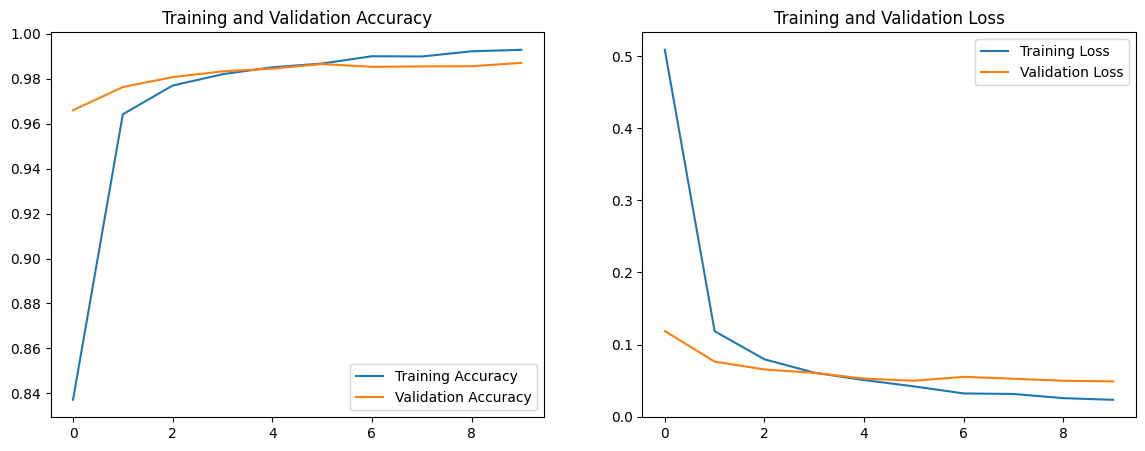

In [12]:
plt.figure(figsize = (14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

## Confusion Matrix

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


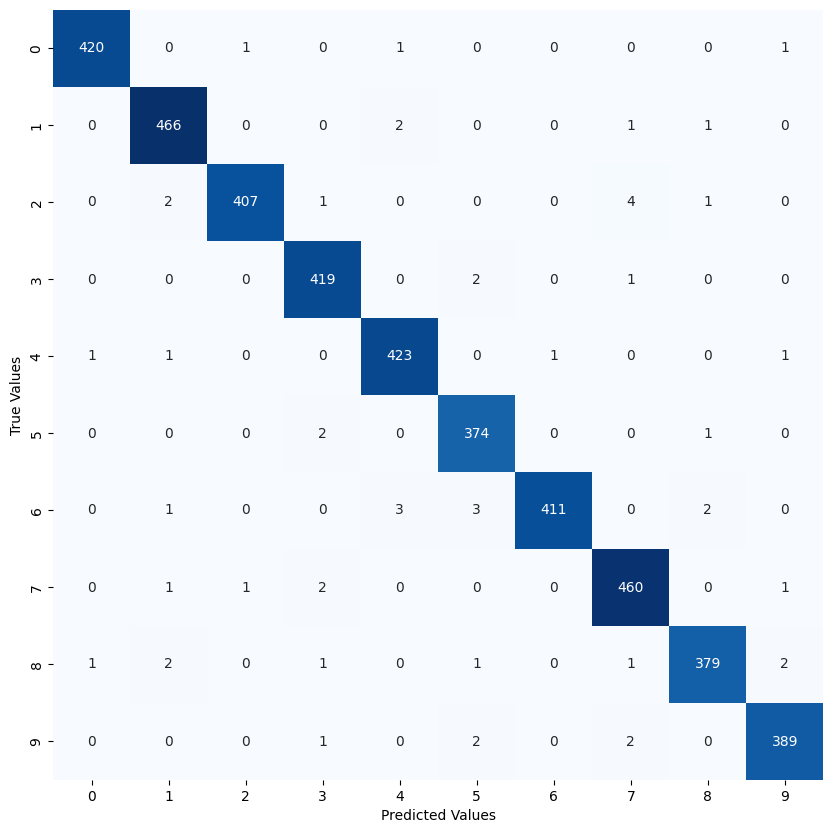

In [13]:
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(X_test)
Y_pred = np.argmax(y_pred, 1)
Y_test = np.argmax(y_test, 1)

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square = True, annot = True, cbar = False, cmap = plt.cm.Blues, fmt = '.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

## Classification Report

In [14]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       422
           1       0.99      0.99      0.99       473
           2       0.98      1.00      0.99       409
           3       0.99      0.98      0.99       426
           4       0.99      0.99      0.99       429
           5       0.99      0.98      0.99       382
           6       0.98      1.00      0.99       412
           7       0.99      0.98      0.99       469
           8       0.98      0.99      0.98       384
           9       0.99      0.99      0.99       394

    accuracy                           0.99      4200
   macro avg       0.99      0.99      0.99      4200
weighted avg       0.99      0.99      0.99      4200



## Evaluation

In [15]:
model.evaluate(X_test, y_test, verbose = False)

[0.04234733805060387, 0.9876190423965454]

## Model Prediction

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


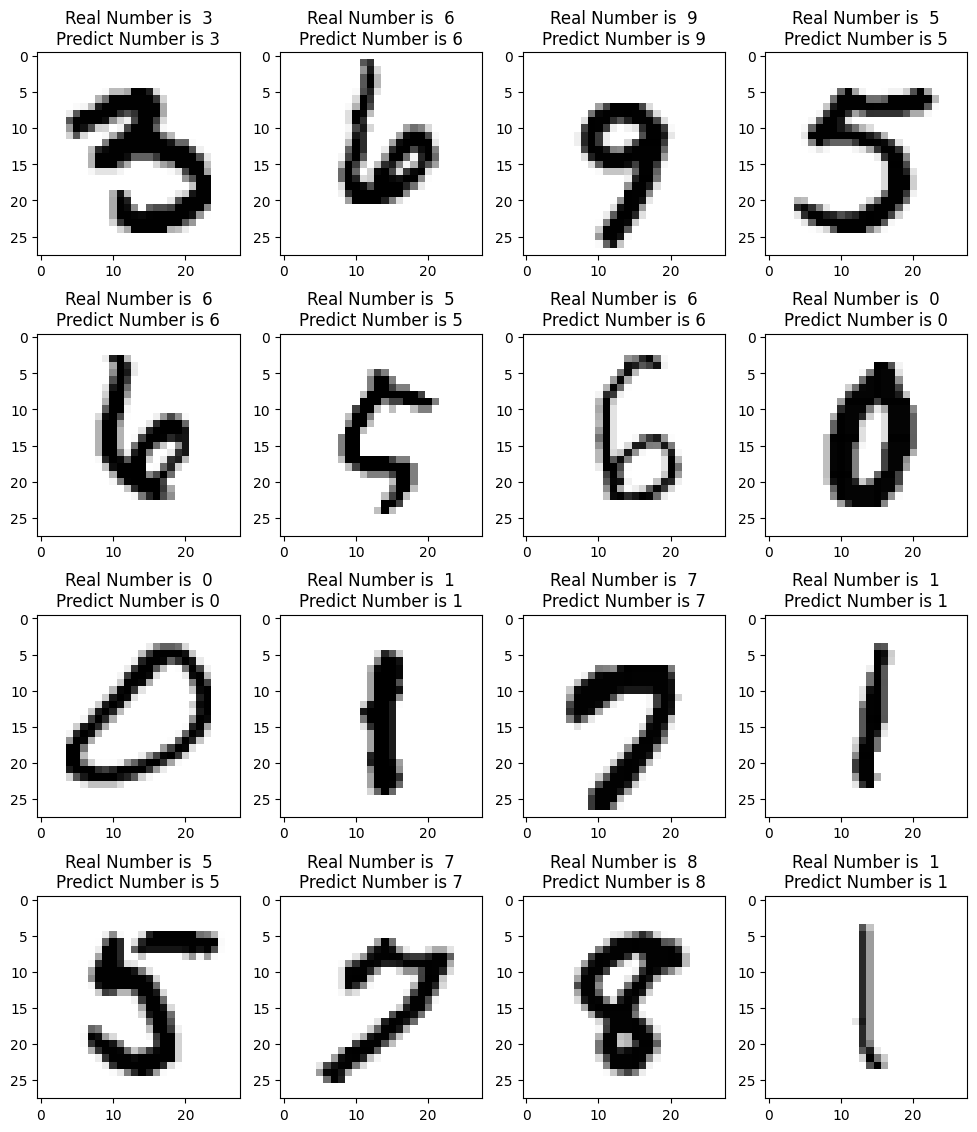

In [16]:
y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize = (12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap = 'binary')
    ax.set(title = f"Real Number is  {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");

## Testing Our Model

875/875 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step


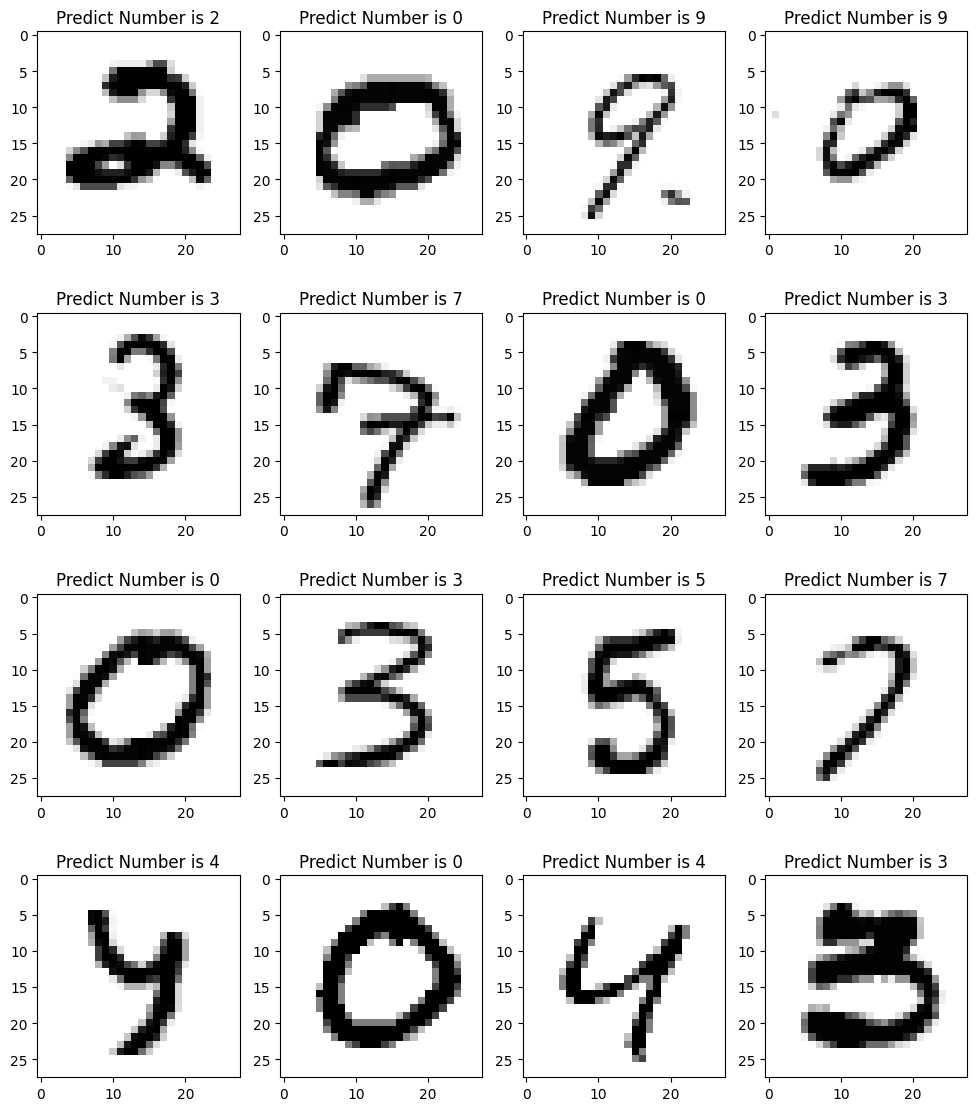

In [17]:
test_x = test.values
test_x = test_x / 255.0
test_x = test_x.reshape(-1, 28, 28, 1)

pred_x = model.predict(test_x)
test_x__ = test_x.reshape(test_x.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(test_x__[i], cmap='binary')
    ax.set(title = f"Predict Number is {pred_x[i].argmax()}");

# Best CNN Model

## Define Model

In [18]:
from tensorflow.keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

## Model Summary

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 232,650 (908.79 KB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)

## Compile Model

In [20]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

## Model Fit

In [21]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=256,
                    verbose=1,
                    validation_split=0.3)

Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 27s 245ms/step - accuracy: 0.4332 - loss: 2.7983 - val_accuracy: 0.9414 - val_loss: 0.5601
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 40s 232ms/step - accuracy: 0.8814 - loss: 0.6994 - val_accuracy: 0.9627 - val_loss: 0.3302
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 42s 241ms/step - accuracy: 0.9191 - loss: 0.4595 - val_accuracy: 0.9650 - val_loss: 0.2591
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 41s 245ms/step - accuracy: 0.9403 - loss: 0.3525 - val_accuracy: 0.9728 - val_loss: 0.2126
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 39s 228ms/step - accuracy: 0.9483 - loss: 0.3063 - val_accuracy: 0.9754 - val_loss: 0.1950
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 23s 220ms/step - accuracy: 0.9533 - loss: 0.2772 - val_accuracy: 0.9746 - val_loss: 0.1923
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 41s 218ms/step - accuracy: 0.9567 - loss: 0.2756 - val_accuracy: 0.9795 - val_loss: 0.1789
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 40s 214ms/step - accuracy: 0.9624 - loss: 0

## Plotting

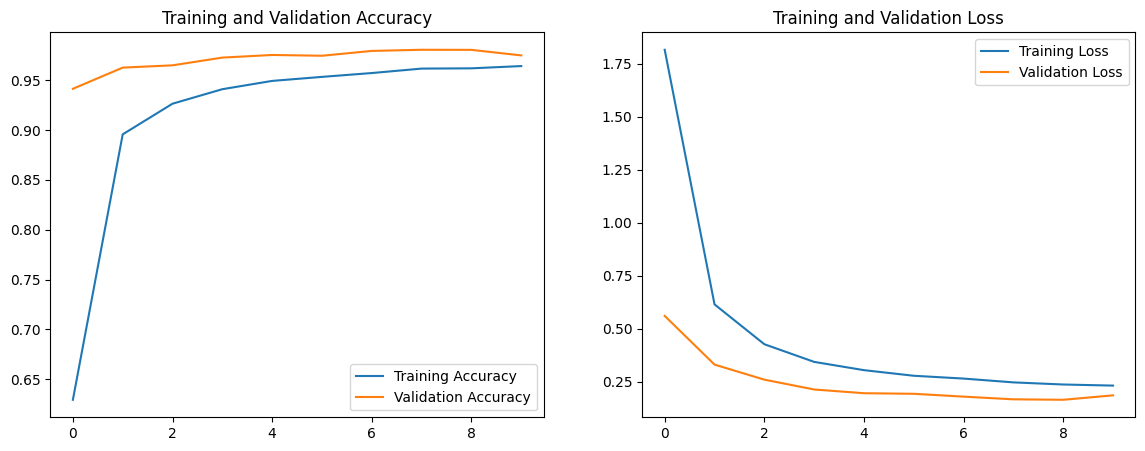

In [22]:
plt.figure(figsize = (14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

## Confusion Matrix

132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step


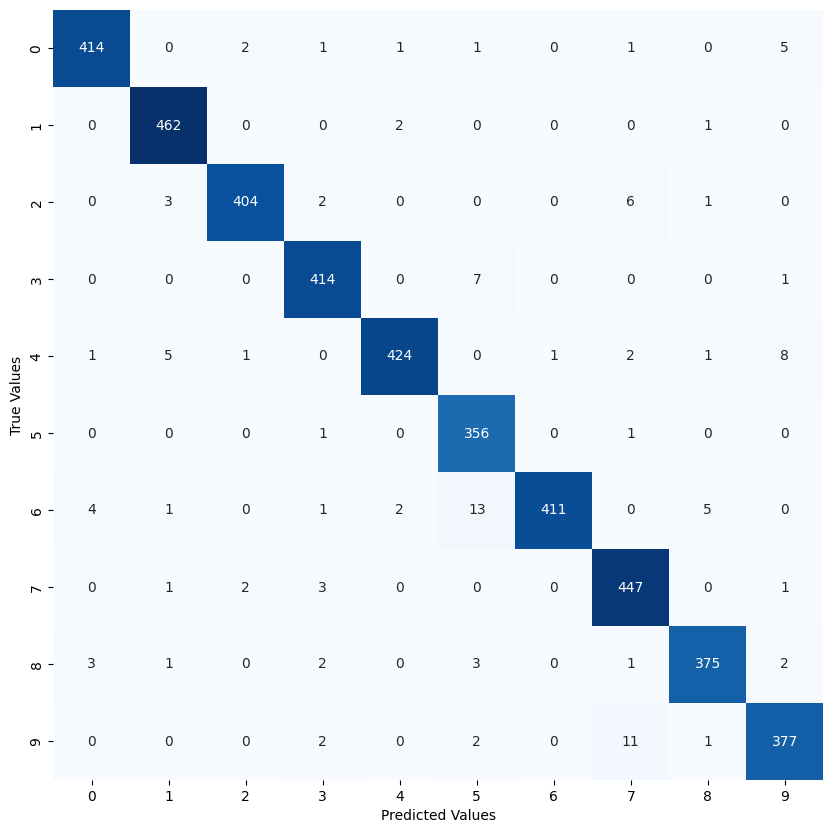

In [23]:
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(X_test)
Y_pred = np.argmax(y_pred, 1)
Y_test = np.argmax(y_test, 1)

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square = True, annot = True, cbar = False, cmap = plt.cm.Blues, fmt = '.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

## Classification Report

In [24]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       422
           1       0.99      0.98      0.99       473
           2       0.97      0.99      0.98       409
           3       0.98      0.97      0.98       426
           4       0.96      0.99      0.97       429
           5       0.99      0.93      0.96       382
           6       0.94      1.00      0.97       412
           7       0.98      0.95      0.97       469
           8       0.97      0.98      0.97       384
           9       0.96      0.96      0.96       394

    accuracy                           0.97      4200
   macro avg       0.97      0.97      0.97      4200
weighted avg       0.97      0.97      0.97      4200



## Evaluation

In [25]:
model.evaluate(X_test, y_test, verbose = False)

[0.18831433355808258, 0.9723809361457825]

## Model Prediction

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


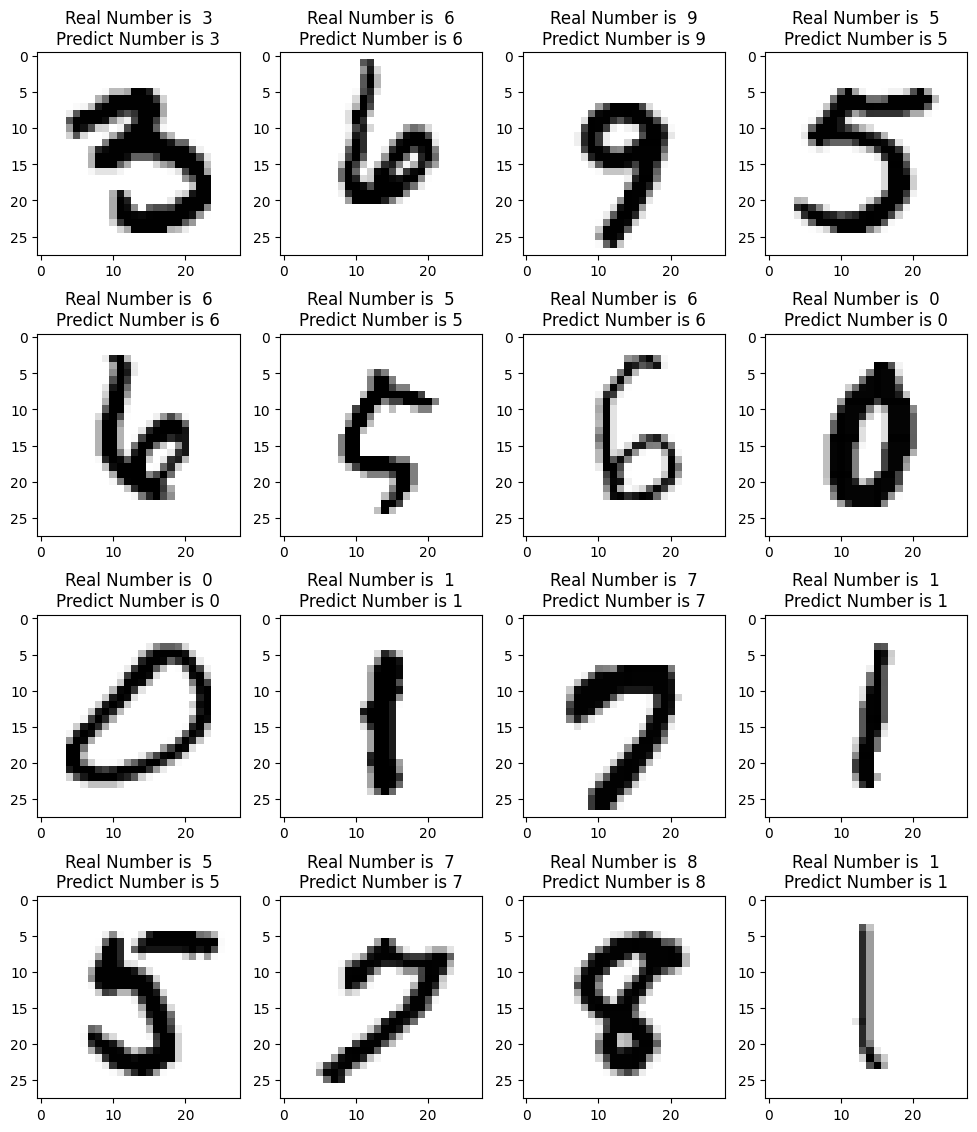

In [26]:
y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize = (12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap = 'binary')
    ax.set(title = f"Real Number is  {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");

## Testing Our Model

875/875 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step


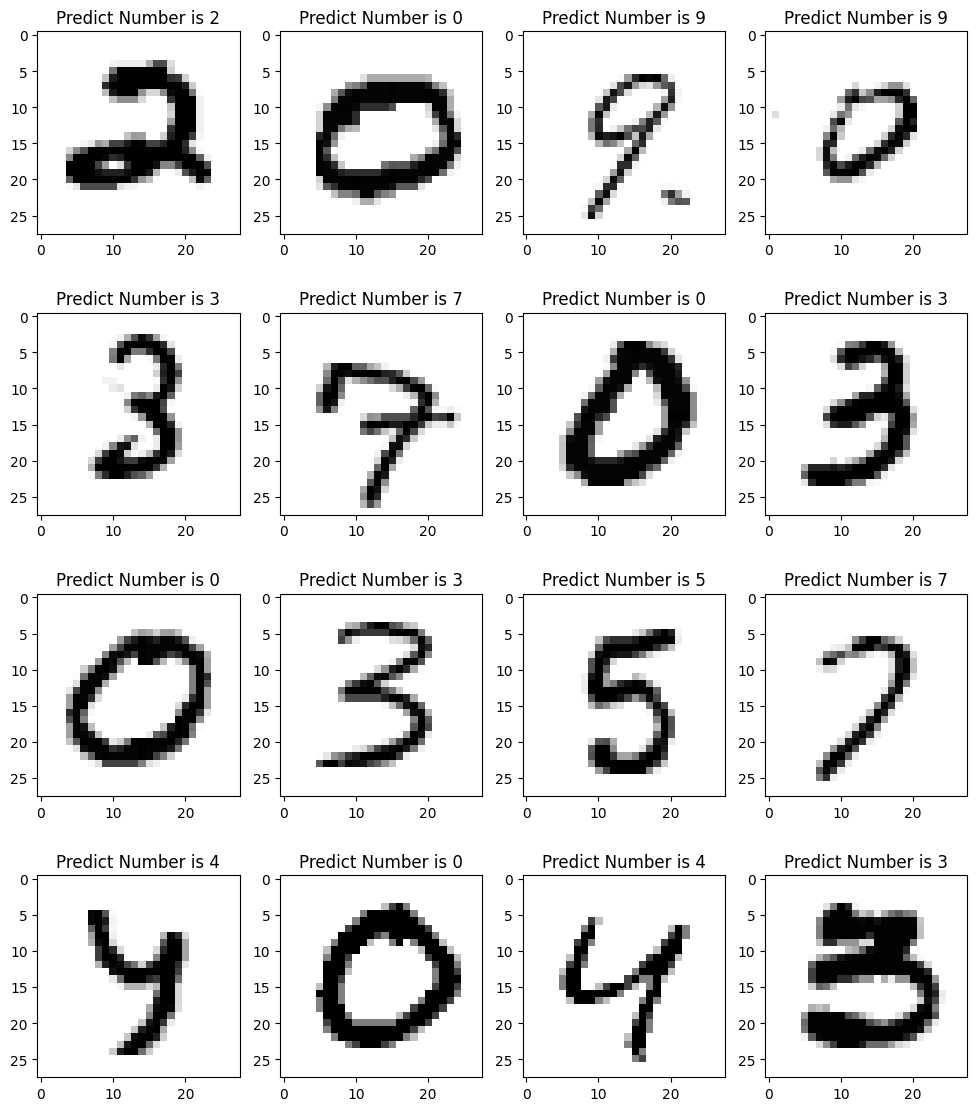

In [27]:
test_x = test.values
test_x = test_x / 255.0
test_x = test_x.reshape(-1, 28, 28, 1)

pred_x = model.predict(test_x)
test_x__ = test_x.reshape(test_x.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(test_x__[i], cmap='binary')
    ax.set(title = f"Predict Number is {pred_x[i].argmax()}");

# Best Model CNN with 50 Epoch

## Define Model

In [28]:
from tensorflow.keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

## Model Summary

In [29]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 232,650 (908.79 KB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)

## Compile Model

In [30]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

## Model Fit

In [31]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=256,
                    verbose=1,
                    validation_split=0.3)

Epoch 1/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 26s 234ms/step - accuracy: 0.4227 - loss: 2.8242 - val_accuracy: 0.9422 - val_loss: 0.5152
Epoch 2/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 22s 213ms/step - accuracy: 0.8842 - loss: 0.6644 - val_accuracy: 0.9611 - val_loss: 0.3149
Epoch 3/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 41s 212ms/step - accuracy: 0.9242 - loss: 0.4367 - val_accuracy: 0.9664 - val_loss: 0.2477
Epoch 4/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 24s 233ms/step - accuracy: 0.9404 - loss: 0.3426 - val_accuracy: 0.9724 - val_loss: 0.2081
Epoch 5/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 41s 231ms/step - accuracy: 0.9480 - loss: 0.3006 - val_accuracy: 0.9740 - val_loss: 0.2000
Epoch 6/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 42s 243ms/step - accuracy: 0.9549 - loss: 0.2769 - val_accuracy: 0.9772 - val_loss: 0.1809
Epoch 7/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 41s 240ms/step - accuracy: 0.9583 - loss: 0.2570 - val_accuracy: 0.9760 - val_loss: 0.1850
Epoch 8/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 41s 241ms/step - accuracy: 0.9593 - loss: 0

## Plotting

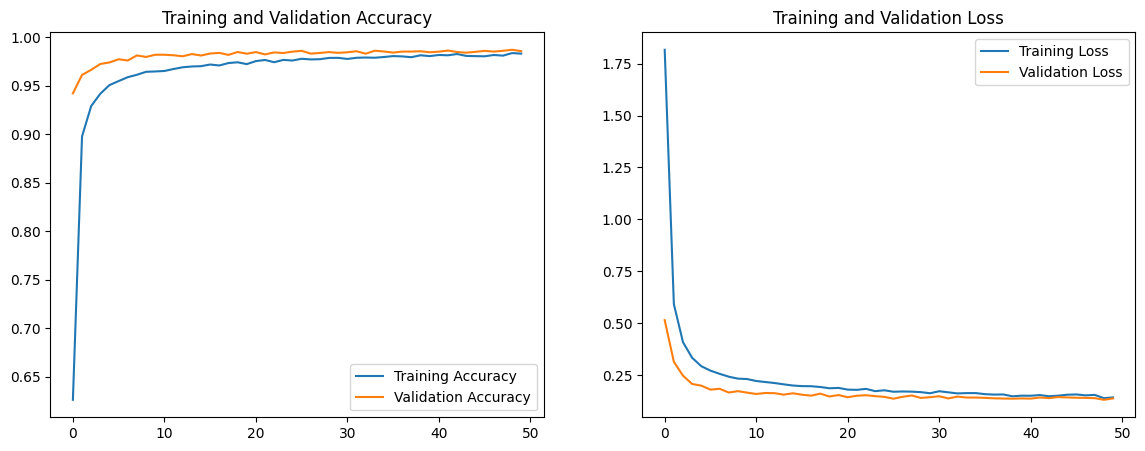

In [32]:
plt.figure(figsize = (14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

## Confusion Matrix

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


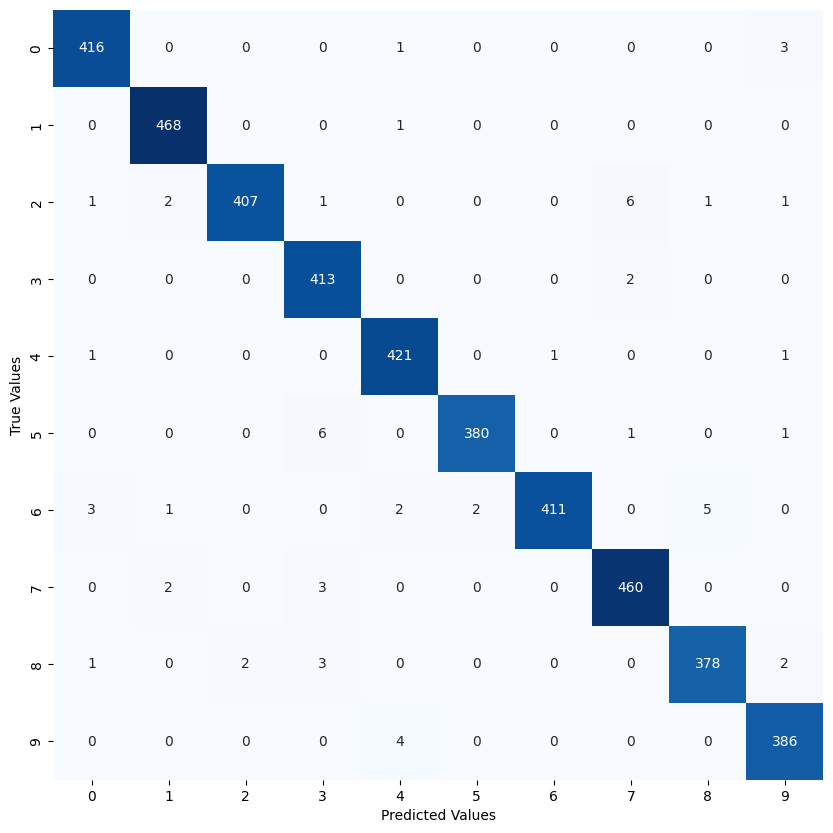

In [33]:
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(X_test)
Y_pred = np.argmax(y_pred, 1)
Y_test = np.argmax(y_test, 1)

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square = True, annot = True, cbar = False, cmap = plt.cm.Blues, fmt = '.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

## Classification Report

In [34]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       422
           1       1.00      0.99      0.99       473
           2       0.97      1.00      0.98       409
           3       1.00      0.97      0.98       426
           4       0.99      0.98      0.99       429
           5       0.98      0.99      0.99       382
           6       0.97      1.00      0.98       412
           7       0.99      0.98      0.99       469
           8       0.98      0.98      0.98       384
           9       0.99      0.98      0.98       394

    accuracy                           0.99      4200
   macro avg       0.99      0.99      0.99      4200
weighted avg       0.99      0.99      0.99      4200



## Evaluation

In [35]:
model.evaluate(X_test, y_test, verbose = False)

[0.1329803466796875, 0.9857142567634583]

## Model Prediction

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


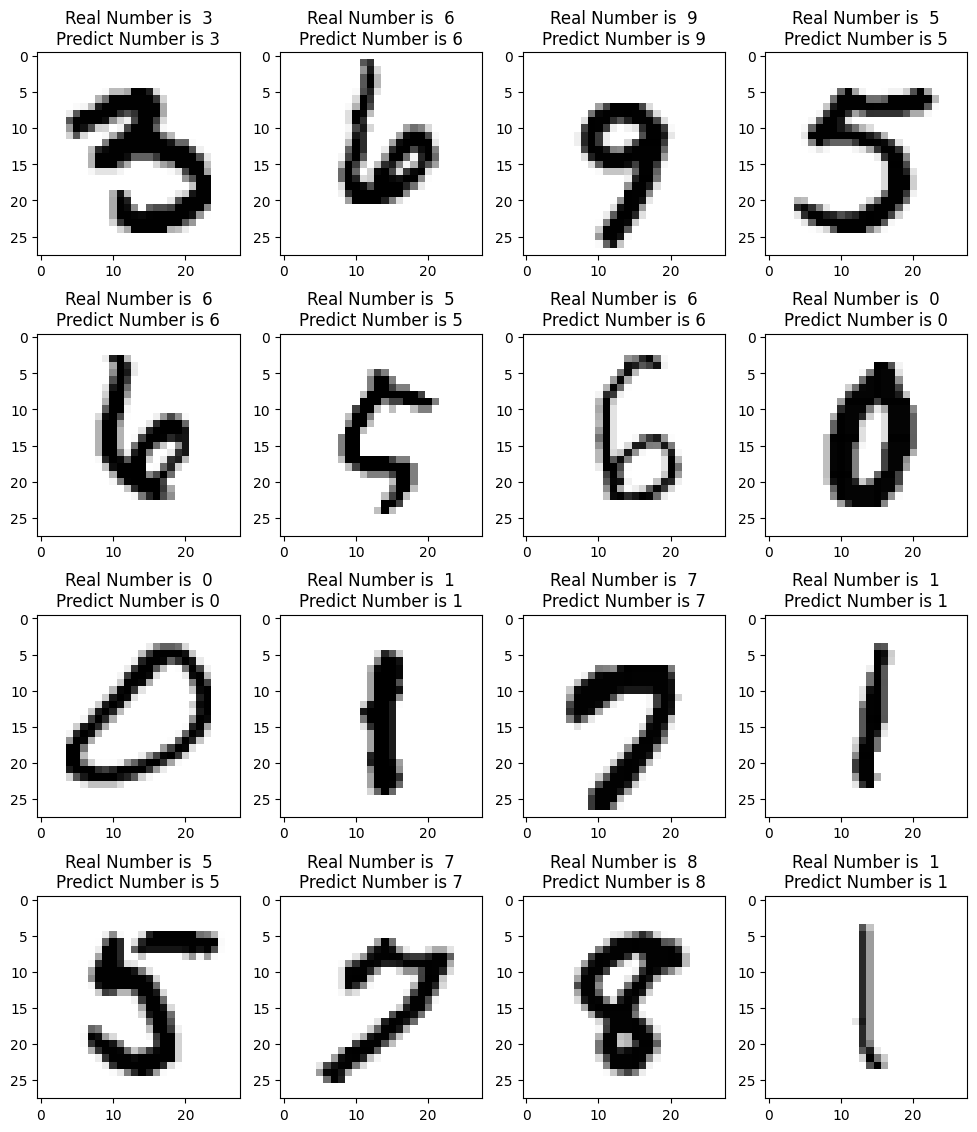

In [36]:
y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize = (12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap = 'binary')
    ax.set(title = f"Real Number is  {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");

## Testing Our Model

875/875 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step


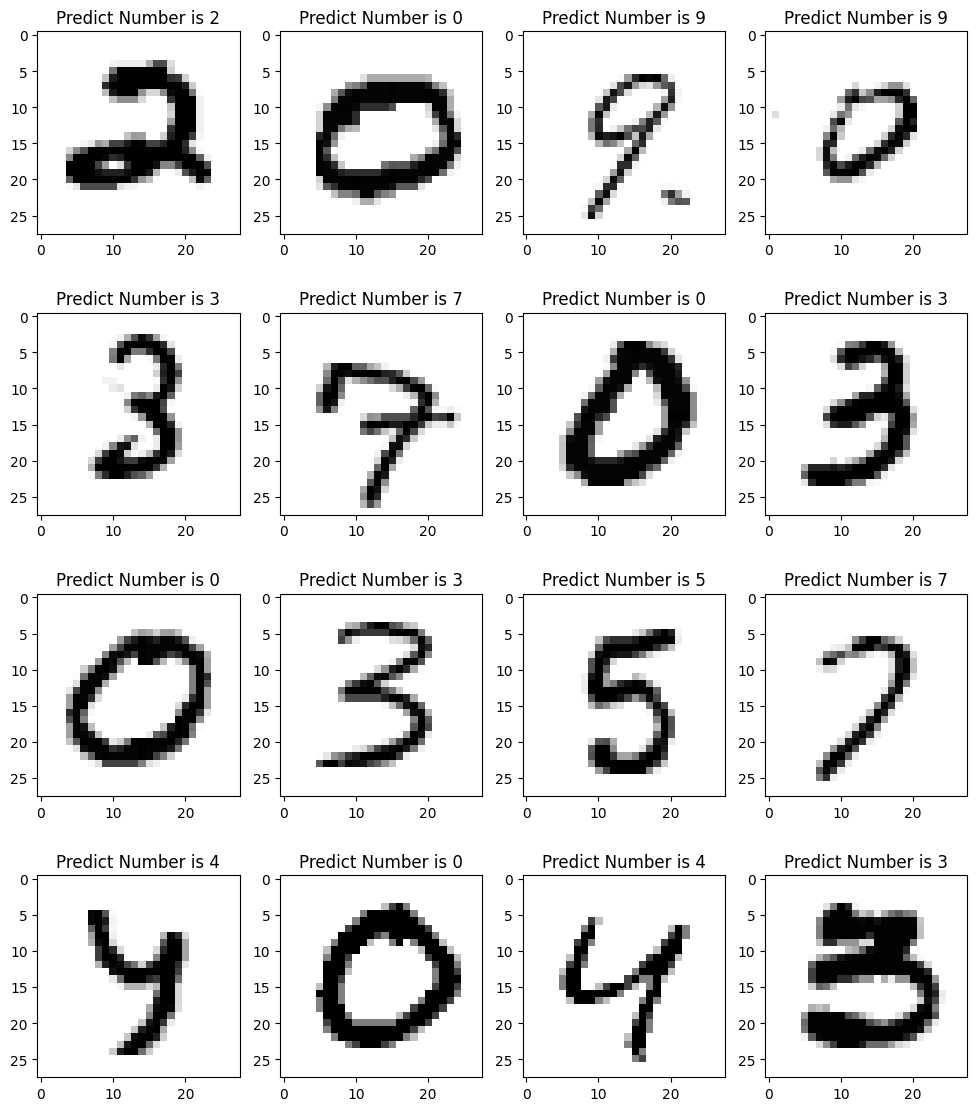

In [37]:
test_x = test.values
test_x = test_x / 255.0
test_x = test_x.reshape(-1, 28, 28, 1)

pred_x = model.predict(test_x)
test_x__ = test_x.reshape(test_x.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(test_x__[i], cmap='binary')
    ax.set(title = f"Predict Number is {pred_x[i].argmax()}");

# Best Model CNN with EarlyStopping

## Define Model

In [38]:
from tensorflow.keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

## Model Summary

In [39]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 232,650 (908.79 KB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)

## Compile Model

In [40]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

## Model Fit

In [41]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=256,
                    verbose=1,
                    validation_split=0.3,
                    callbacks=[early_stopping])

Epoch 1/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 25s 226ms/step - accuracy: 0.4415 - loss: 2.8335 - val_accuracy: 0.9491 - val_loss: 0.5119
Epoch 2/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 24s 233ms/step - accuracy: 0.8898 - loss: 0.6474 - val_accuracy: 0.9649 - val_loss: 0.3031
Epoch 3/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 24s 235ms/step - accuracy: 0.9291 - loss: 0.4234 - val_accuracy: 0.9673 - val_loss: 0.2514
Epoch 4/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 42s 247ms/step - accuracy: 0.9422 - loss: 0.3393 - val_accuracy: 0.9741 - val_loss: 0.2131
Epoch 5/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 39s 225ms/step - accuracy: 0.9538 - loss: 0.2958 - val_accuracy: 0.9776 - val_loss: 0.1876
Epoch 6/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 24s 225ms/step - accuracy: 0.9566 - loss: 0.2735 - val_accuracy: 0.9753 - val_loss: 0.1891
Epoch 7/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 24s 234ms/step - accuracy: 0.9579 - loss: 0.2620 - val_accuracy: 0.9707 - val_loss: 0.2076
Epoch 8/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 42s 248ms/step - accuracy: 0.9561 - loss: 0

## Plotting

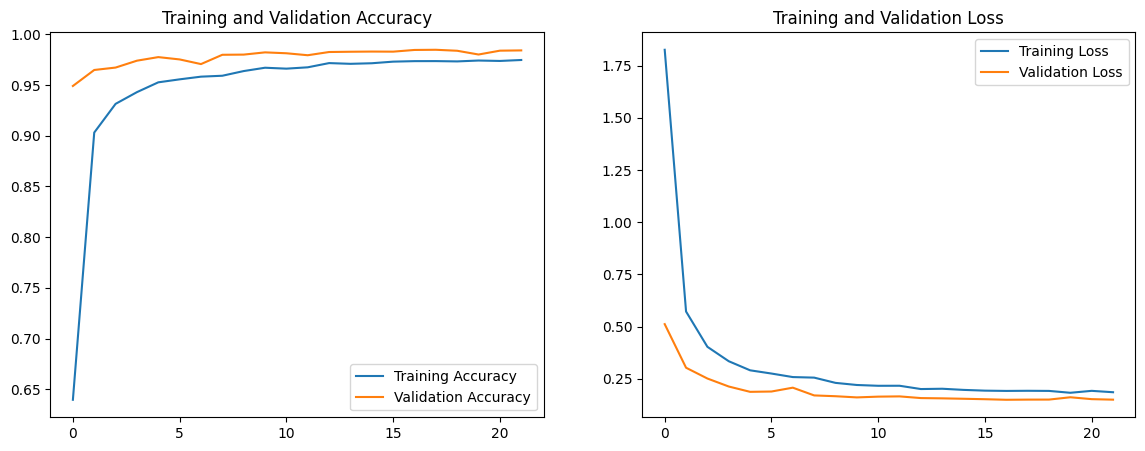

In [42]:
plt.figure(figsize = (14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

## Confusion Matrix

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


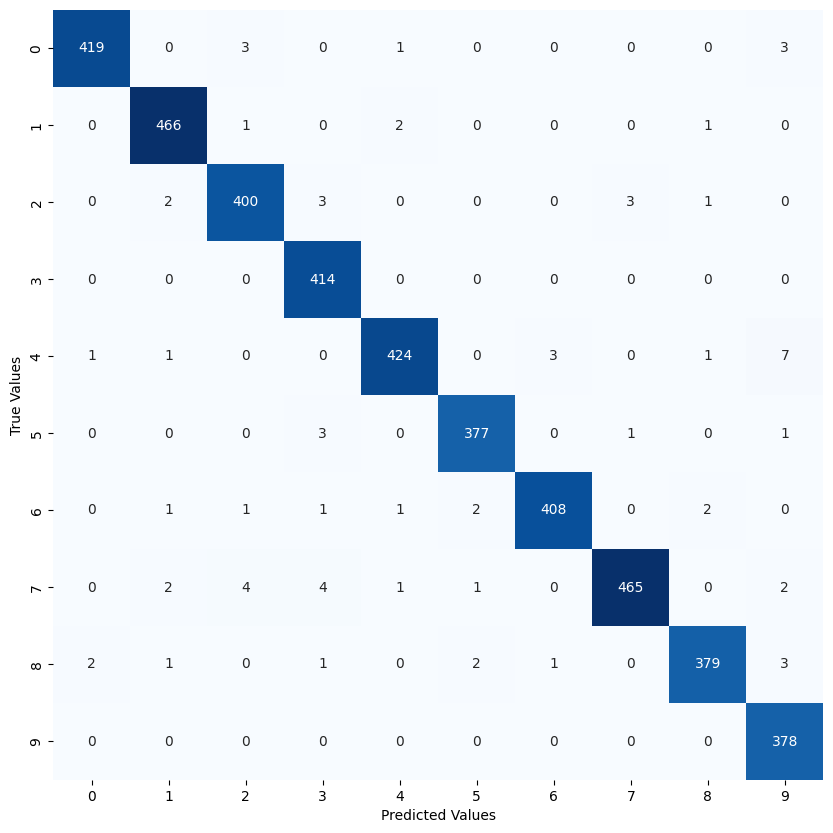

In [43]:
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(X_test)
Y_pred = np.argmax(y_pred, 1)
Y_test = np.argmax(y_test, 1)

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square = True, annot = True, cbar = False, cmap = plt.cm.Blues, fmt = '.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

## Classification Report

In [44]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       422
           1       0.99      0.99      0.99       473
           2       0.98      0.98      0.98       409
           3       1.00      0.97      0.99       426
           4       0.97      0.99      0.98       429
           5       0.99      0.99      0.99       382
           6       0.98      0.99      0.99       412
           7       0.97      0.99      0.98       469
           8       0.97      0.99      0.98       384
           9       1.00      0.96      0.98       394

    accuracy                           0.98      4200
   macro avg       0.98      0.98      0.98      4200
weighted avg       0.98      0.98      0.98      4200



## Evaluation

In [45]:
model.evaluate(X_test, y_test, verbose = False)

[0.15761099755764008, 0.9833333492279053]

## Model Prediction

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


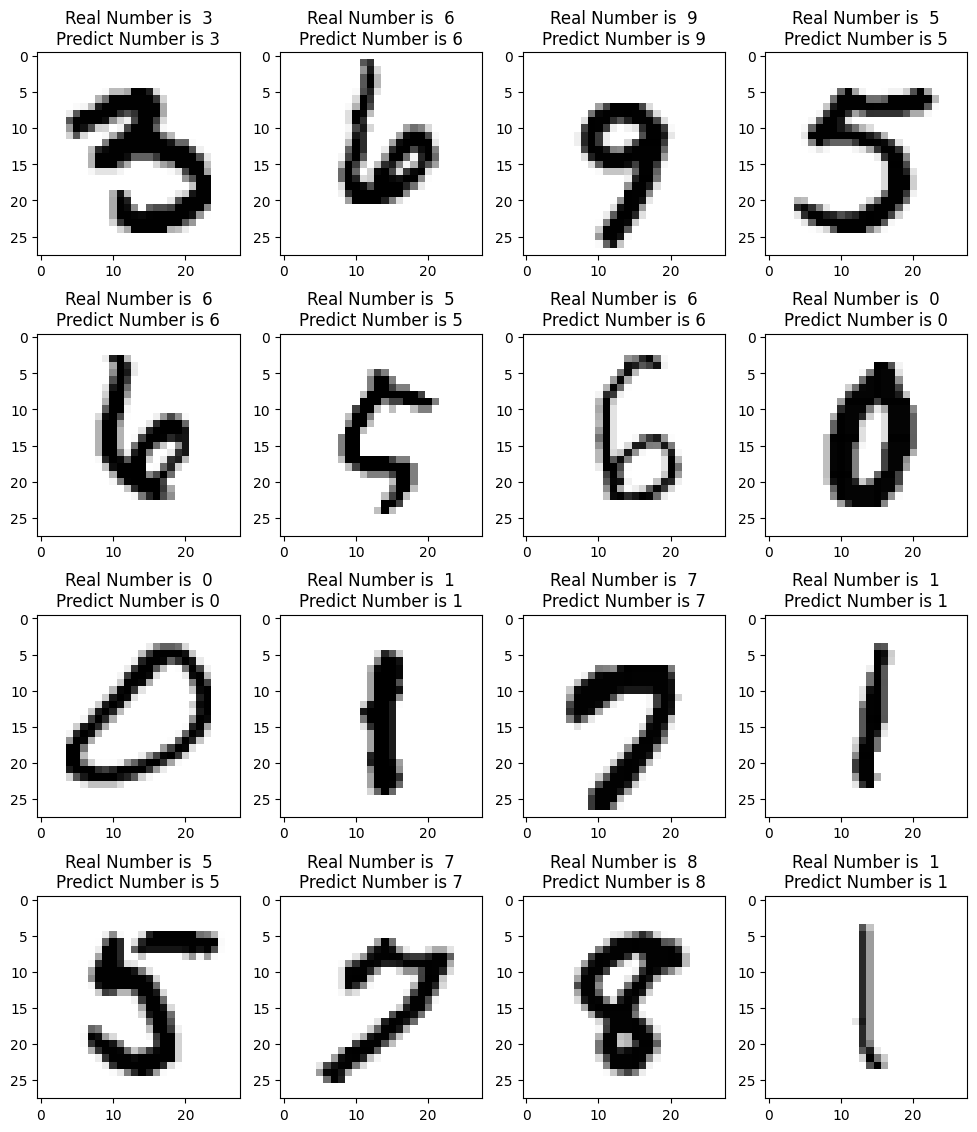

In [46]:
y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize = (12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap = 'binary')
    ax.set(title = f"Real Number is  {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");

## Testing Our Model

875/875 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step


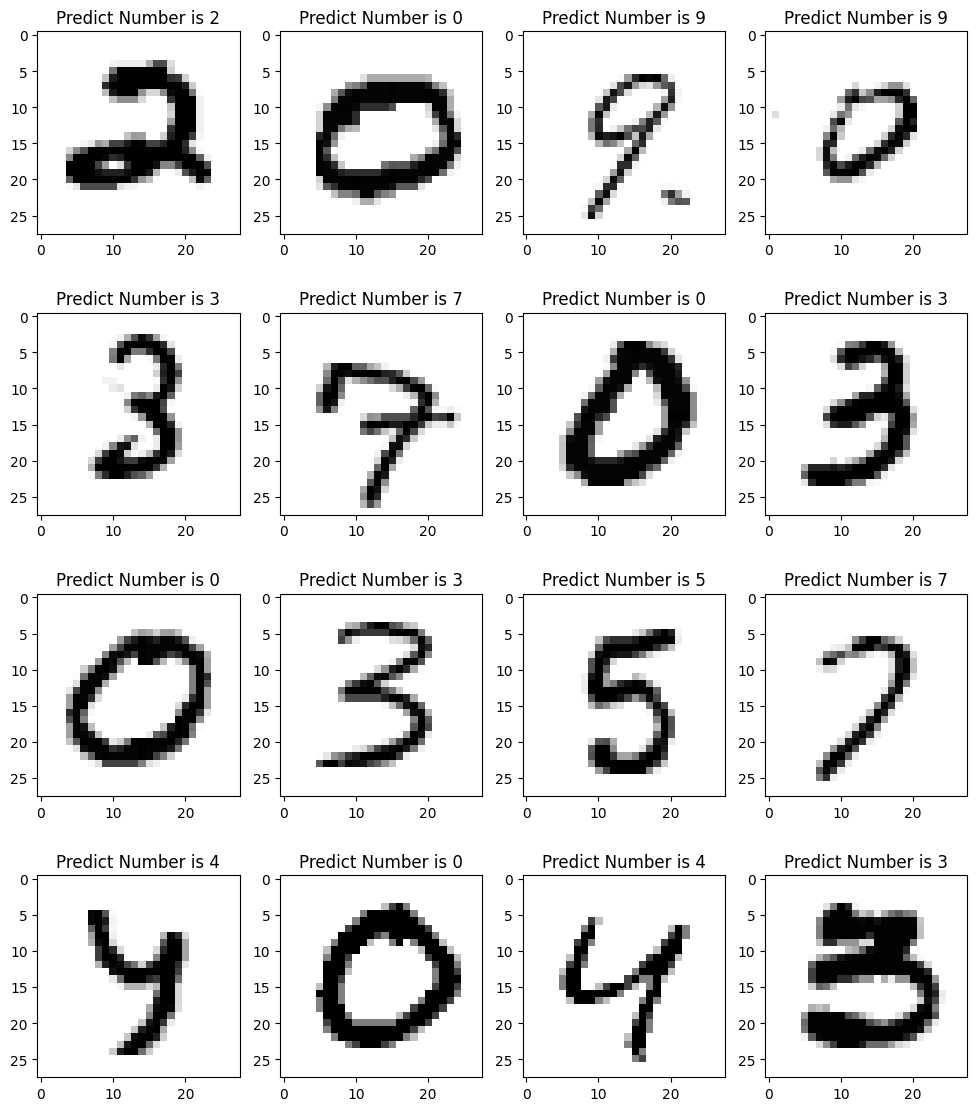

In [47]:
test_x = test.values
test_x = test_x / 255.0
test_x = test_x.reshape(-1, 28, 28, 1)

pred_x = model.predict(test_x)
test_x__ = test_x.reshape(test_x.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(test_x__[i], cmap='binary')
    ax.set(title = f"Predict Number is {pred_x[i].argmax()}");